In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("bigMart.csv")

In [3]:
dataset.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
features = dataset.columns.values

In [5]:
print(features[0])

Item_Identifier


# Missing Value Ratio

In [6]:
missing_arr = dataset.isnull().sum()/len(dataset)*100

In [7]:
print(missing_arr)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [8]:
threshold = 20.0
features_valid = []
for i in range(len(missing_arr)):
    if missing_arr[i] < threshold:
        features_valid.append(features[i])
        dataset[features[i]].fillna(dataset[features[i]].mode()[0],inplace=True)
    else:
        dataset = dataset.drop(features[i],axis=1)

In [9]:
print(features_valid)

['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']


In [10]:
dataset.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Location_Type        Outlet_Type  \
0                       1999               Tier 1  Supermarket Type1   
1                       2009               Tier 3  Supermarket Type2   
2                       1999               Tier 1  Supermarket Type1   
3                       1998               Tier 3      Grocery Store   
4                       1987               Tier 3  Supermarket Type1   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

In [11]:
missing_arr = dataset.isnull().sum()/len(dataset)*100

In [12]:
print(missing_arr)

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64


# Low Variance Filter

In [13]:
dataset.var()

Item_Weight                  1.793133e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

In [14]:
df = dataset[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']]

In [15]:
df.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.000000  182.0950                       1998   
4         8.93         0.000000   53.8614                       1987   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

In [16]:
threshold = 10.0
features = df.columns.values
features_v = []
var_arr = df.var()
for i in range(len(features)):
    if var_arr[i] < threshold:
        df = df.drop(features[i],axis=1)
    else:
        features_v.append(features[i])        

In [17]:
df.head()

Item_Weight  Item_MRP  Outlet_Establishment_Year  Item_Outlet_Sales
0         9.30  249.8092                       1999          3735.1380
1         5.92   48.2692                       2009           443.4228
2        17.50  141.6180                       1999          2097.2700
3        19.20  182.0950                       1998           732.3800
4         8.93   53.8614                       1987           994.7052

In [18]:
print(features_v)

['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


# High Correlation Filter

In [19]:
df.corr()

Item_Weight  Item_MRP  Outlet_Establishment_Year  \
Item_Weight                   1.000000  0.025258                   0.035689   
Item_MRP                      0.025258  1.000000                   0.005020   
Outlet_Establishment_Year     0.035689  0.005020                   1.000000   
Item_Outlet_Sales             0.006443  0.567574                  -0.049135   

                           Item_Outlet_Sales  
Item_Weight                         0.006443  
Item_MRP                            0.567574  
Outlet_Establishment_Year          -0.049135  
Item_Outlet_Sales                   1.000000

# Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [23]:
reg = RandomForestRegressor(random_state=4,max_depth=10)
y = dataset['Item_Outlet_Sales'].values
dataset = dataset.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1)
dataset = pd.get_dummies(dataset)

In [24]:
dataset.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.000000  182.0950                       1998   
4         8.93         0.000000   53.8614                       1987   

   Item_Fat_Content_LF  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                    0                         1                         0   
1                    0                         0                         1   
2                    0                         1                         0   
3                    0                         0                         1   
4                    0                         1                         0   

   Item_Fat_Content_low fat  Item_Fat_Content_reg  Item_Type_Baking Goods  \
0                         0                     0                       0   
1                         0                     0                       0   
2                         0                     0                       0   
3                         0                     0                       0   
4                         0                     0                       0   

   ...  Item_Type_Snack Foods  Item_Type_Soft Drinks  Item_Type_Starchy Foods  \
0  ...                      0                      0                        0   
1  ...                      0                      1                        0   
2  ...                      0                      0                        0   
3  ...                      0                      0                        0   
4  ...                      0                      0                        0   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                            1                            0   
1                            0                            0   
2                            1                            0   
3                            0                            0   
4                            0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                            0                          0   
1                            1                          0   
2                            0                          0   
3                            1                          1   
4                            1                          0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              0                              1   
2                              1                              0   
3                              0                              0   
4                              1                              0   

   Outlet_Type_Supermarket Type3  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 32 columns]

In [41]:
reg = reg.fit(dataset.iloc[:,:].values,y)

In [42]:
features_validity = reg.feature_importances_

In [43]:
print(features_validity)

[1.79251863e-02 4.04219712e-02 5.12843383e-01 2.23721373e-02
 1.10744853e-03 2.02995361e-03 1.90572247e-03 1.02012619e-03
 6.38446534e-04 1.27691492e-03 8.04494899e-04 1.78268460e-03
 1.57393092e-03 3.26369739e-03 1.90580581e-03 3.54367166e-03
 1.01610620e-03 1.47068954e-03 1.87700524e-03 1.44023676e-03
 5.52440907e-04 1.04462664e-03 3.18437174e-03 2.42827127e-03
 1.31995036e-03 2.17461067e-03 9.70284018e-04 1.60520005e-03
 2.76338579e-01 2.05813843e-03 4.05957482e-04 8.76979556e-02]


In [44]:
index = np.argsort(features_validity)[-9:]

In [45]:
print(index)

[22 13 15  0  3  1 31 28  2]


In [46]:
features_importances = []
features_valid = []
for item in index:
    features_valid.append(dataset.columns.values[item])
    features_importances.append(features_validity[item])

In [47]:
print(len(features_valid),len(features_importances))

9 9


In [48]:
print(features_valid,features_importances)

['Item_Type_Snack Foods', 'Item_Type_Dairy', 'Item_Type_Fruits and Vegetables', 'Item_Weight', 'Outlet_Establishment_Year', 'Item_Visibility', 'Outlet_Type_Supermarket Type3', 'Outlet_Type_Grocery Store', 'Item_MRP'] [0.003184371743978215, 0.003263697387222287, 0.0035436716550802257, 0.017925186279671365, 0.022372137277794666, 0.04042197123431978, 0.08769795555812603, 0.27633857933319883, 0.5128433834773485]


Text(0, 0.5, 'Features')

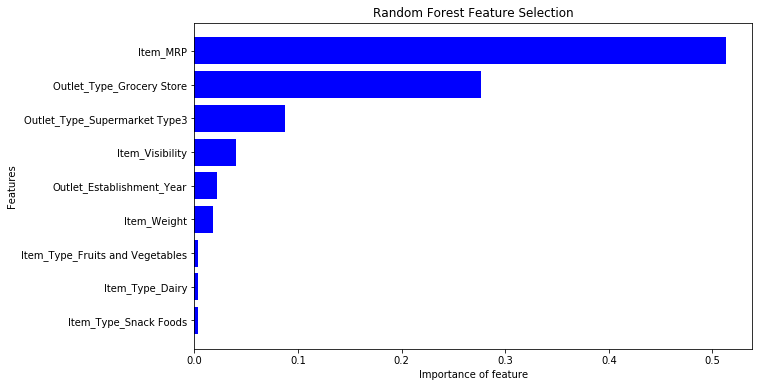

In [49]:
plt.figure(figsize=(10,6))
plt.yticks(range(len(index)),[features_valid[i] for i in range(len(features_valid))])
plt.barh(range(len(index)),features_importances,color='blue',align='center')
plt.title("Random Forest Feature Selection")
plt.xlabel('Importance of feature')
plt.ylabel('Features')

# Backward Feature Elimination

In [50]:
from sklearn.feature_selection import RFE

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lreg = LinearRegression()

In [53]:
rfe = RFE(lreg,10)

In [54]:
print(rfe)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=10, step=1, verbose=0)


In [56]:
rfe.fit(df.iloc[:,:].values,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=10, step=1, verbose=0)

# Forward Feature Selection

In [57]:
from sklearn.feature_selection import f_regression

In [59]:
f_reg = f_regression(df.iloc[:,:].values,y)

In [60]:
print(f_reg)

(array([ 3.53789461e-01,  4.04945623e+03,  2.06215699e+01, -1.59896552e+18]), array([5.51991600e-01, 0.00000000e+00, 5.67308211e-06, 1.00000000e+00]))
